In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [4]:
station = np.loadtxt('official_station.txt', delimiter="    ", dtype='str')

In [5]:
df = pd.read_csv('NL_WOW_METADATA.csv')#('backup_extraction.csv')

In [6]:
replace_dict = {'Zeer open':'Very open', 'Open':'Open', 'Standaard':'Standard', 'Beperkt':'Restricted', 'Beschut':'Sheltered', 'Zeer Beschut':'Very Sheltered', 'Rooftop':'Rooftop', "Traffic":"Traffic", 'Unknown':"Unknown"}#{'5':'Very open', '4':'Open', '3':'Standard', '2':'Restricted', '1':'Sheltered', '0':'Very Sheltered' , 'R':'Rooftop', "T":"Traffic", 'U':"Unknown"}
replace_dict_before = {"l":'U'}

df = df.replace({"Meting luchttemperatuur": replace_dict_before, "Meting neerslag":replace_dict_before, "Meting wind":replace_dict_before, "Stedelijke zone":replace_dict_before, "Waarneemuren":replace_dict_before, "Ligging":replace_dict_before})
df = df.replace({"Ligging": replace_dict})

In [7]:
def pie_plot(df, column, name=''):
    sizes = df[column].value_counts().sort_index() / df[column].value_counts().sum() * 100
    
    colours = {'1': 'C0',
           '2': 'C1',
           '3': 'C2',
           '4': 'C3',
           '5': 'C4',
           '6': 'C5',
           '7': 'C6',
           'U': 'C7',
           'A': 'C8',
           'B': 'C9',
           'C': 'C10',
           'D': 'C11',
           '0': 'C12',
           'Unknown': 'C7'}
    
    labels = sorted(df[column].unique())

    #print(sorted(labels), [colours[key] for key in labels])

    plt.pie(sizes,
            autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance=1.2,
            colors=[colours[key] for key in labels])
    plt.axis('equal')
    plt.legend(sizes.index, loc="best", title='Category')
   
    if name != '':
        plt.title(name)
    else: 
        plt.title(column)
    
    plt.tight_layout()
    plt.show()
    return None 

In [8]:
def pie_plot2(df, column, name=''):
    sizes = df[column].value_counts().sort_index() / df[column].value_counts().sum() * 100

    plt.pie(sizes,
            autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance=1.2)
    plt.axis('equal')
    plt.legend(sizes.index, loc="best", title='Category')
    
    if name != '':
        plt.title(name)
    else: 
        plt.title(column)
    plt.tight_layout()
    plt.show()
    return None 

In [9]:
metadata_columns = df.columns[11:-5]

In [10]:
lowerdf = df[df["star_rating"] <=  2]
clean_lowerdf = lowerdf[metadata_columns].replace("Unknown", 'U').melt()

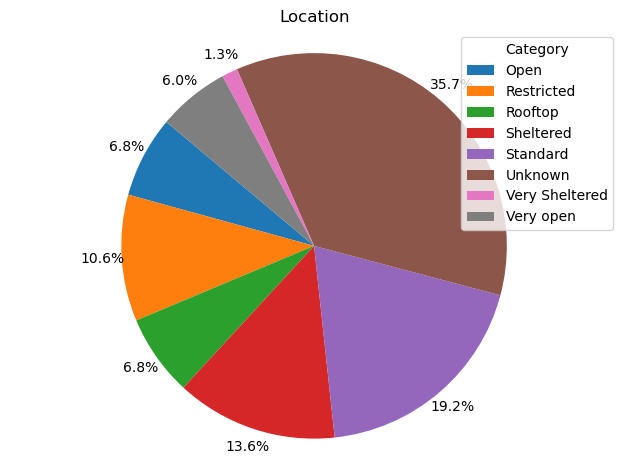

In [11]:
pie_plot2(df, 'Ligging', 'Location')

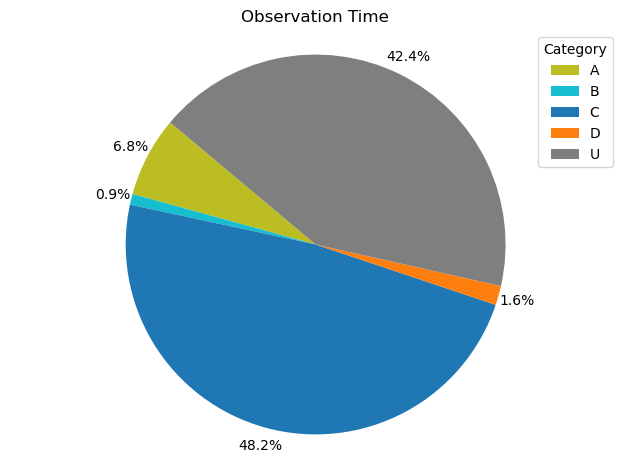

In [12]:
pie_plot(df, 'Waarneemuren', 'Observation Time')

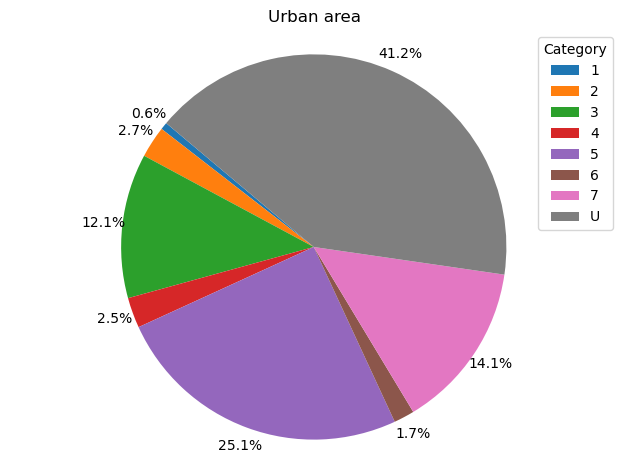

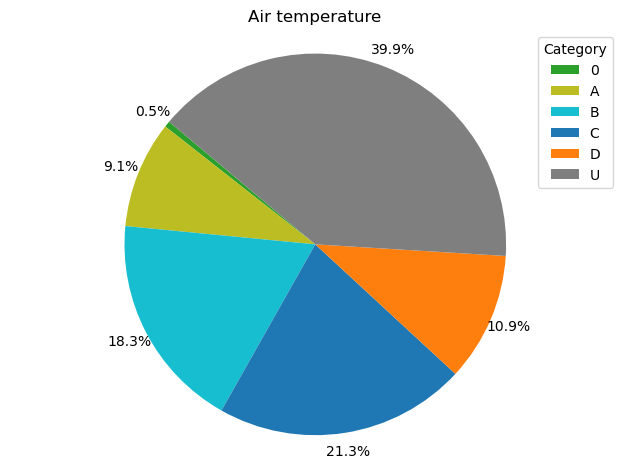

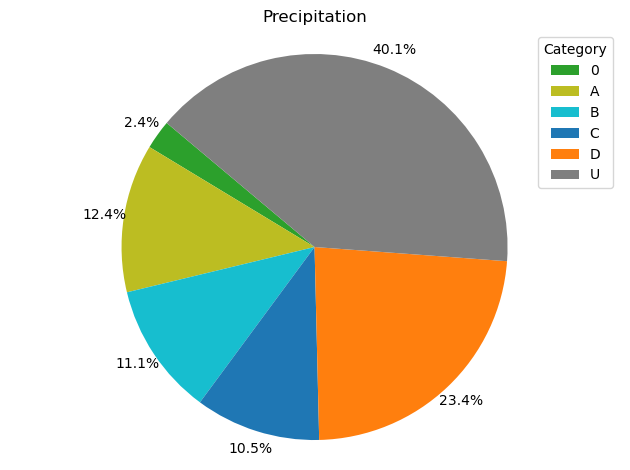

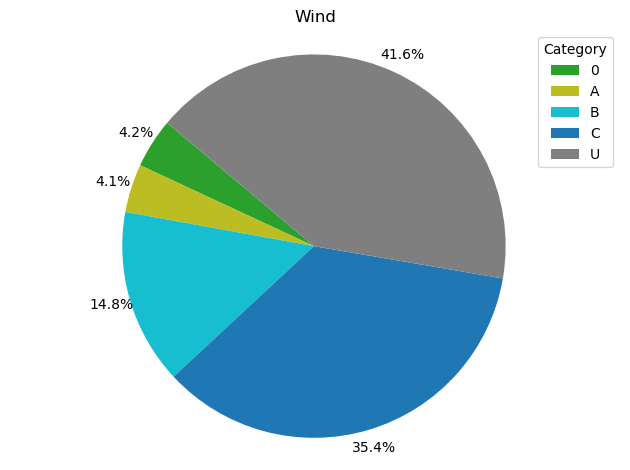

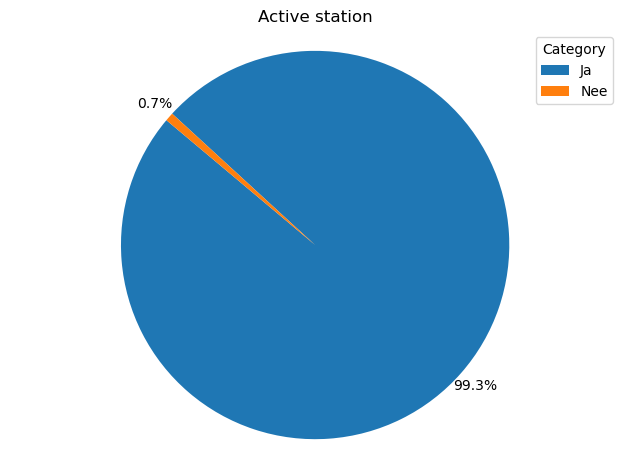

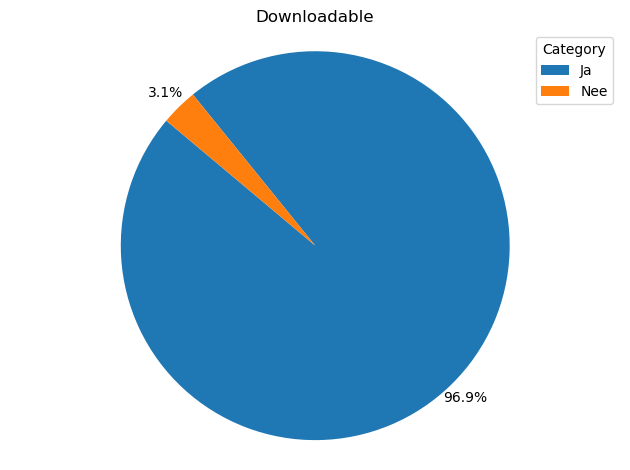

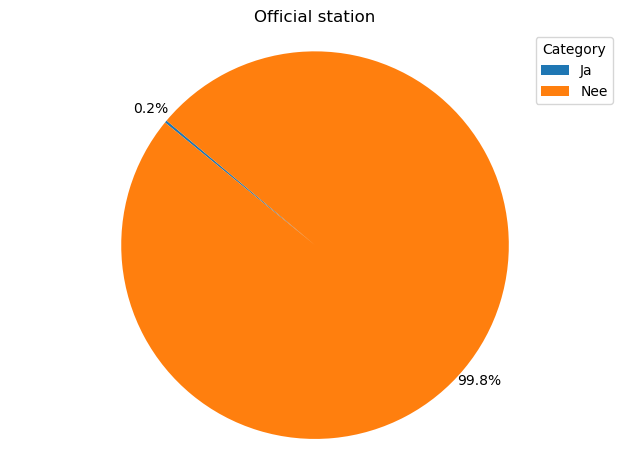

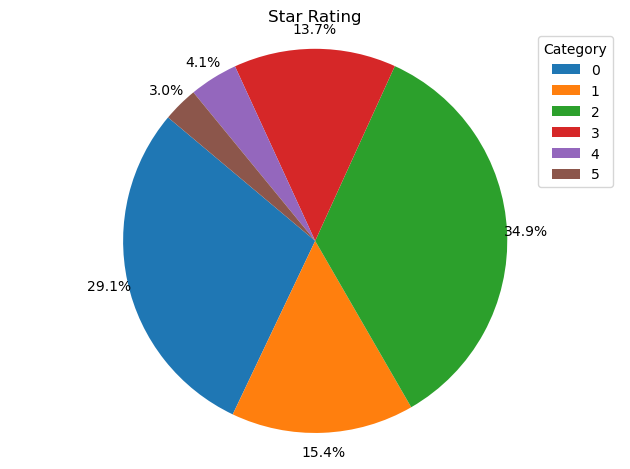

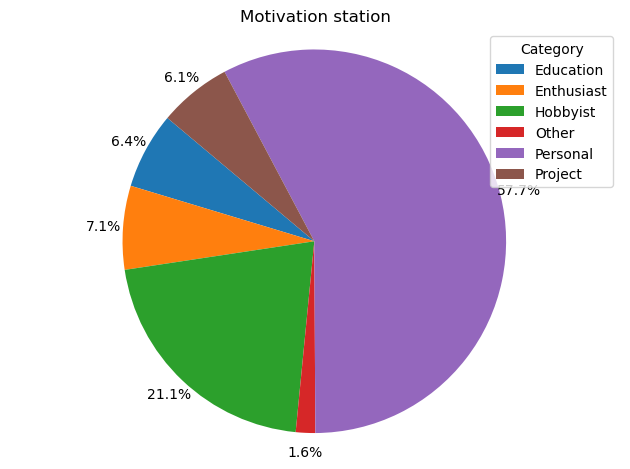

In [13]:
pie_plot(df, 'Stedelijke zone', 'Urban area')
pie_plot(df, 'Meting luchttemperatuur', 'Air temperature')
pie_plot(df, 'Meting neerslag', 'Precipitation')
pie_plot(df, 'Meting wind', 'Wind')
pie_plot2(df, 'Actief station', 'Active station')
pie_plot2(df, 'Data downloaden toegestaan?', 'Downloadable')
pie_plot2(df, 'Officieel station', 'Official station')
pie_plot2(df, 'star_rating', 'Star Rating')
pie_plot2(df, 'Motivatie station', 'Motivation station')

# Wordcloud

In [14]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

from stop_words import get_stop_words
stop_words = get_stop_words('dutch')

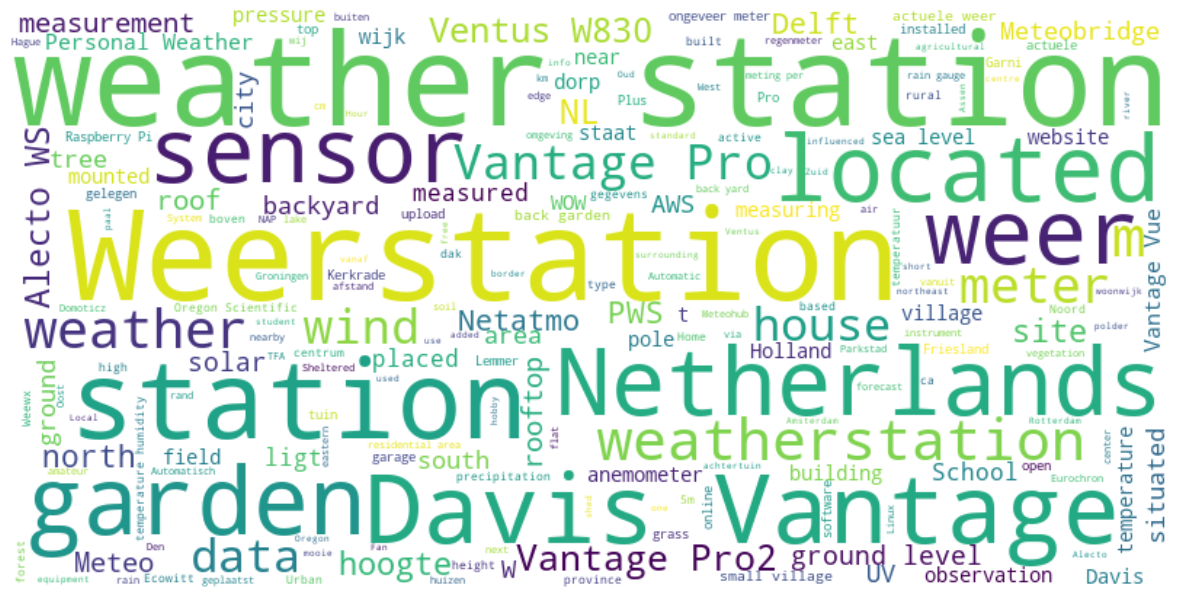

In [15]:
text = " ".join(i for i in df.description.dropna())
stopwords = list(STOPWORDS) + stop_words #dutch and english
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=800, height=400).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

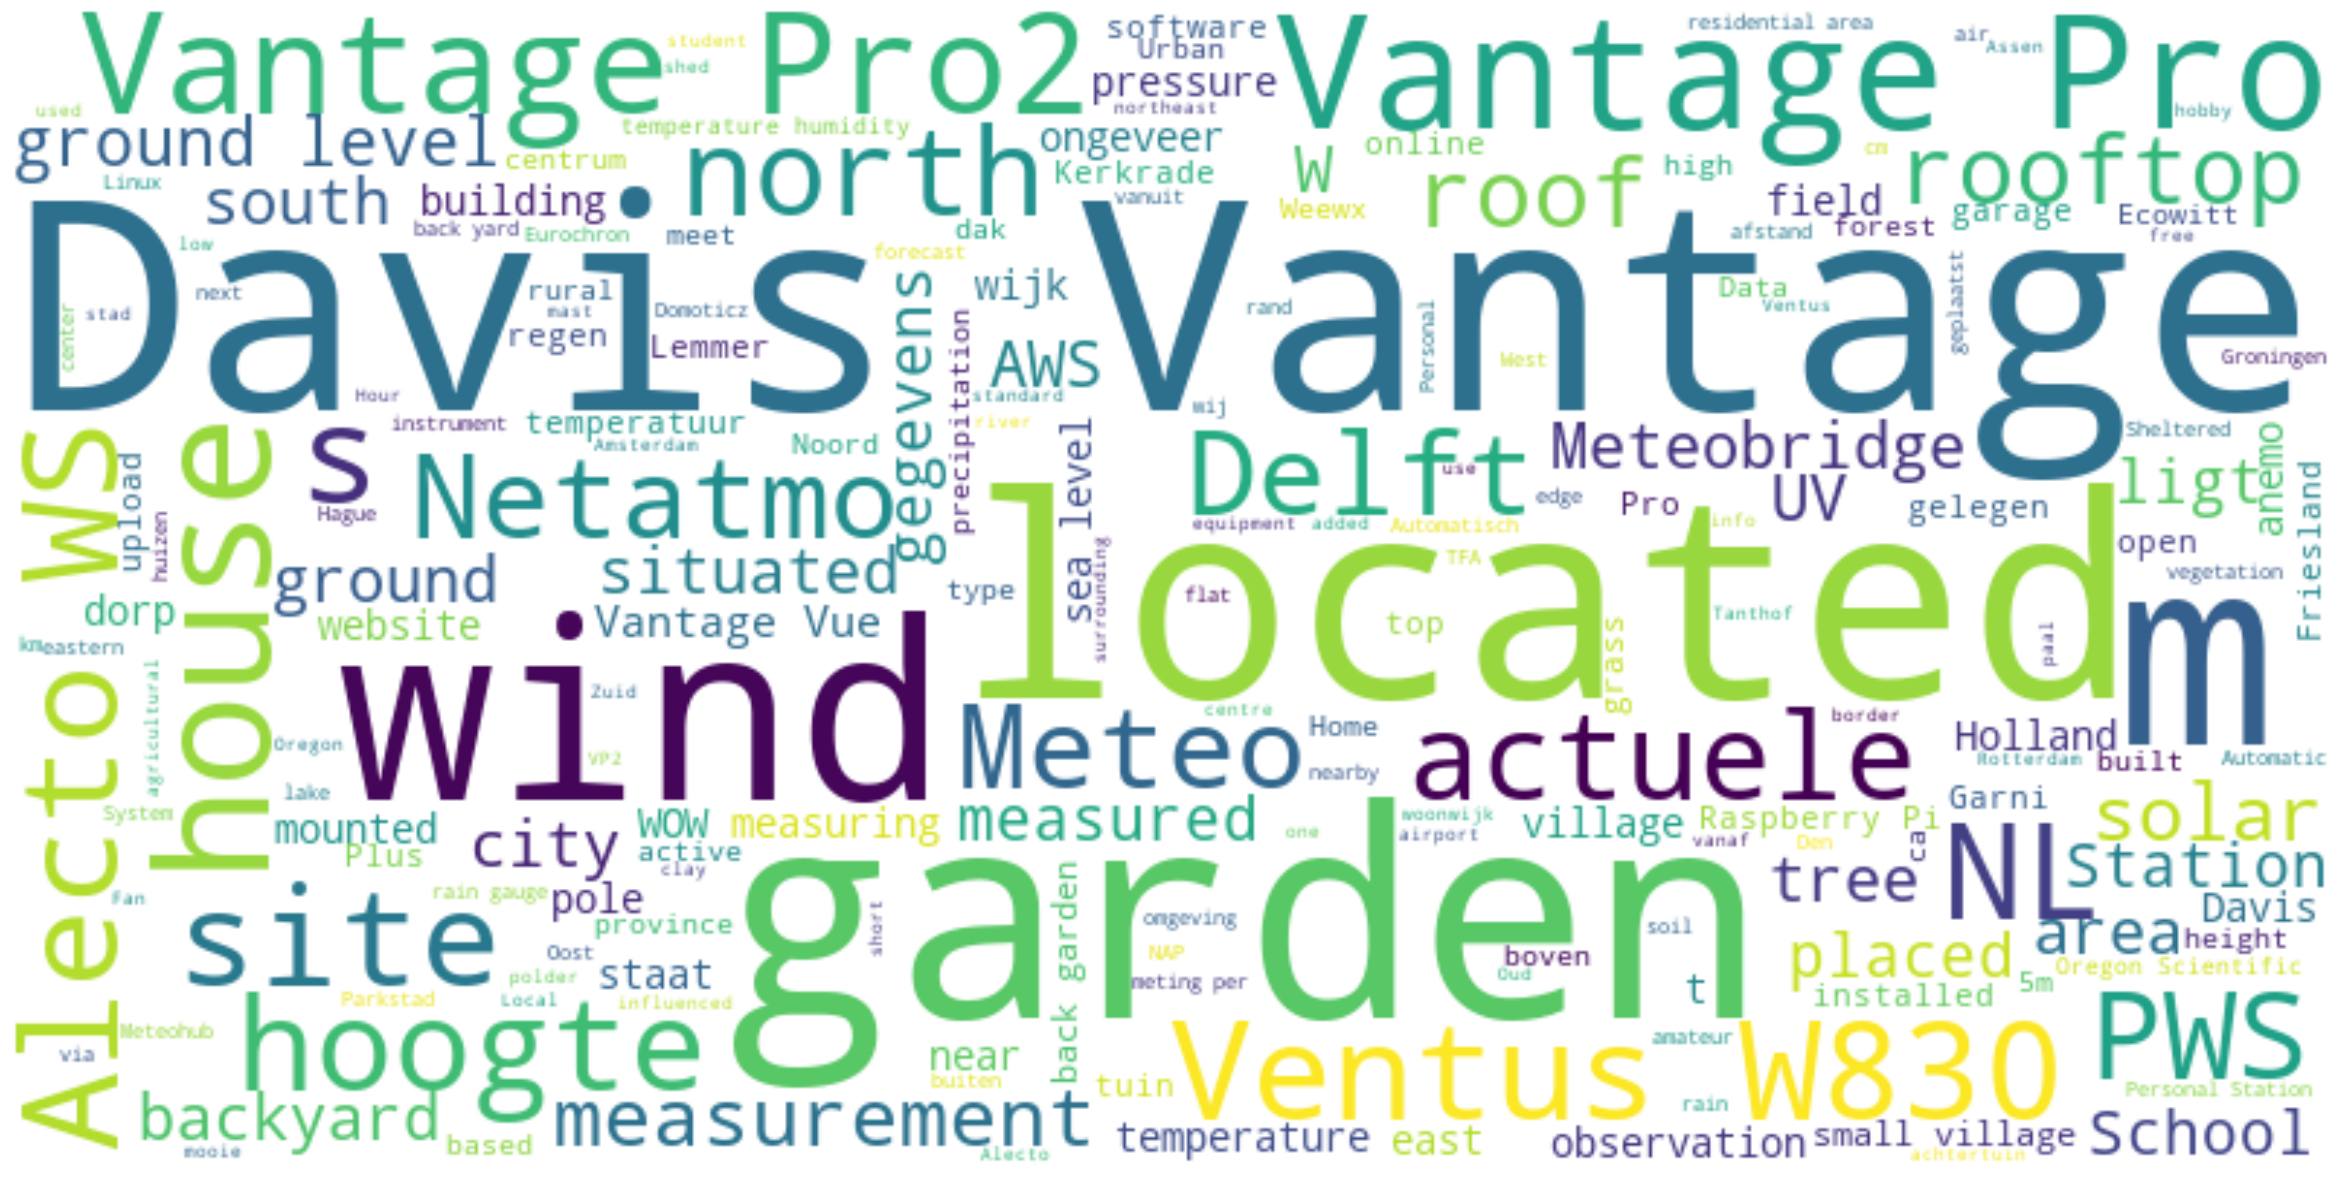

In [16]:
#without obvious things
text = text.replace('weather', '')
text = text.replace('station', '')
text = text.replace('weatherstation', '')
text = text.replace('weerstation', '')
text = text.replace('Netherlands', '')
text = text.replace('Weatherstation', '')
text = text.replace('Weer', '')
text = text.replace('Weather', '')
text = text.replace('weer', '')
text = text.replace('sensor', '')
text = text.replace('data', '')
text = text.replace('meter', '')


wordcloud2 = WordCloud(stopwords=stopwords, background_color="white",width=800, height=400).generate(text)
plt.figure( figsize=(30,20))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
import seaborn as sns

In [18]:
df_prof = pd.read_csv("DIST_PROF.csv")
df_amat = pd.read_csv("DIST_AMATEUR.csv")

c:\Users\adila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Histrogram and KDE of Distance to Nearest Proffesional Station for PWS in The Netherlands')

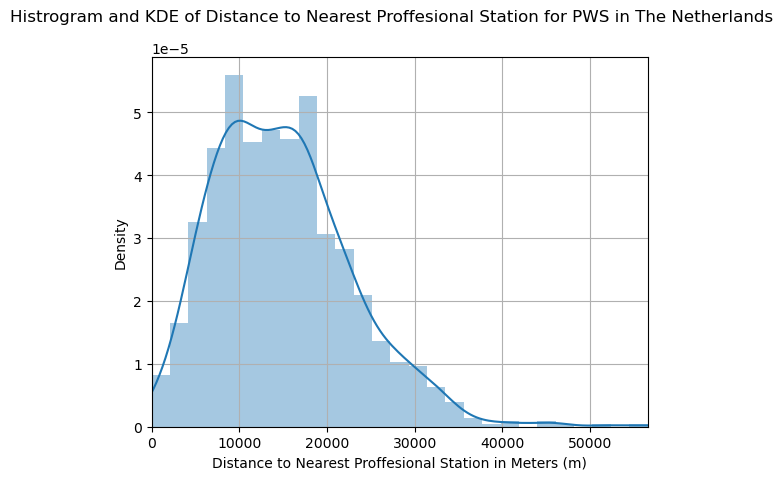

In [19]:
sns.distplot(df_prof['HubDist'])
plt.grid()
plt.title("")
plt.xlim([0, df_prof['HubDist'].max()])
plt.xlabel("Distance to Nearest Proffesional Station in Meters (m)")
plt.suptitle("Histrogram and KDE of Distance to Nearest Proffesional Station for PWS in The Netherlands")

c:\Users\adila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Histrogram and KDE of Distance to Nearest Neighbor Station for PWS in The Netherlands')

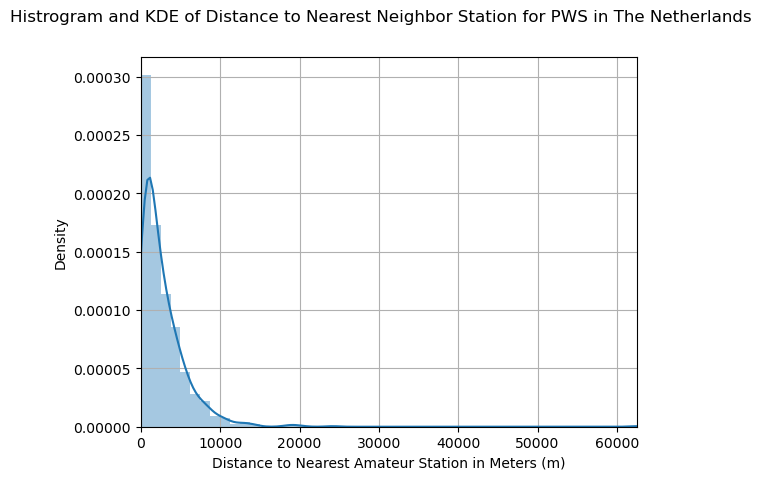

In [20]:
sns.distplot(df_amat['MIN'])
plt.grid()
plt.xlim([0,df_amat['MIN'].max()])
plt.xlabel("Distance to Nearest Amateur Station in Meters (m)")
plt.suptitle("Histrogram and KDE of Distance to Nearest Neighbor Station for PWS in The Netherlands")

# Land Cover Analysis

In [21]:
lgn = pd.read_csv('LGN_PWS.csv')

In [22]:
replace_dict2 = {1:'1 - agrarisch gras', 2:'2 - maïs', 3:'3 - aardappelen', 4:'4 - bieten', 5:'5 - granen', 9:'9 - boomgaarden', 11:'11 - loofbos', 16:'16 - zoet water', 18:'18 - bebouwing in primair bebouwd gebied', 19:'19 - bebouweing in secundair bebouwd gebied', 20:'20 - bos in primair bebouwd gebied', 22:'22 - bos in secundair bebouwd gebied', 23:'23 - gras in primair bebouwd gebied', 26:'26 - bebouwing in buitengebied', 27:'27 - overig grondgebruik in buitengebied', 28:'28 - gras in secundair bebouwd gebied', 31:'31 - open zand in kustgebied', 45:'45 - natuurlijk beheerde agrarische graslanden', 61:'61 - boomkwkerijen', 62:'62 - fruitkwekerijen', 251:'251 - hoofdinfrastructuur en spoorbaanlichamen', 252:'252 - halfverharde wegen, infrastructuur langzaam verkeer en overige infrastructuur'}

colours2 = {1: '#73df1f',
        2: '#e89919',
        3: '#b26600',
        4: '#e51f7f',
        5: '#ffff00',
        9: '#3cef45',
        11: '#33c800',
        16: '#2473ff',
        18: '#ff0000',
        19: '#730000',
        20: '#93d600',
        22: '#93aa00',
        23: '#93ff00',
        26: '#761818',
        27: '#ff645a',
        28: '#a8ef44',
        31: '#e6fb00',
        45: '#b6b639',
        61: '#ffb3a8',
        62: '#e3ff70',
        251: '#871b00',
        252: '#b02300'}

colours = {}
for i in colours2:
    colours[replace_dict2[i]] = colours2[i]

In [23]:
lgn = lgn.replace({'LGN_1':replace_dict2})

In [24]:
sizes = lgn['LGN_1'].value_counts().sort_index() / lgn['LGN_1'].value_counts().sum() * 100
labels = sorted(lgn['LGN_1'].unique())

In [25]:
import re

In [26]:
new_labels = []
for i in range(len(labels)):
    new_labels.append(labels[i] + rf" $\bf{({round(sizes.values[i],2)})}$" +'%')

sorted_labels = sorted(new_labels, key=lambda s: int(re.search(r'\d+', s).group()))

# Land Cover Analysis

In [27]:
test = pd.DataFrame(sizes)

In [28]:
labels_sort = sorted(list(replace_dict2.values()), key=lambda s: int(re.search(r'\d+', s).group()))

In [29]:
sizes_sorted = test.loc[labels_sort]

In [30]:
sizes_sorted["LGN_1"]

1 - agrarisch gras                                                                      4.856512
2 - maïs                                                                                0.110375
3 - aardappelen                                                                         0.220751
4 - bieten                                                                              0.110375
5 - granen                                                                              0.331126
9 - boomgaarden                                                                         0.110375
11 - loofbos                                                                            0.551876
16 - zoet water                                                                         0.883002
18 - bebouwing in primair bebouwd gebied                                               33.002208
19 - bebouweing in secundair bebouwd gebied                                             2.649007
20 - bos in primair bebouwd ge

In [31]:
# plt.pie(test,
#         colors=[colours[key] for key in [i.split('$')[0][:-1] for i in labels]])#, labels = [i.split(' ')[0] for i in labels])
# plt.legend(sorted_labels, loc="center left", bbox_to_anchor=(1.1, 0.5), title='Category', fontsize='10')
# plt.title('Landcover Types of the WOW-NL Weather Stations')
# plt.tight_layout()
# plt.show()

In [32]:
colors = {}
for i in range(len(colours)):
    colors[sorted_labels[i]] = colours[list(colours.keys())[i]]

In [33]:
sns.set_style("whitegrid")

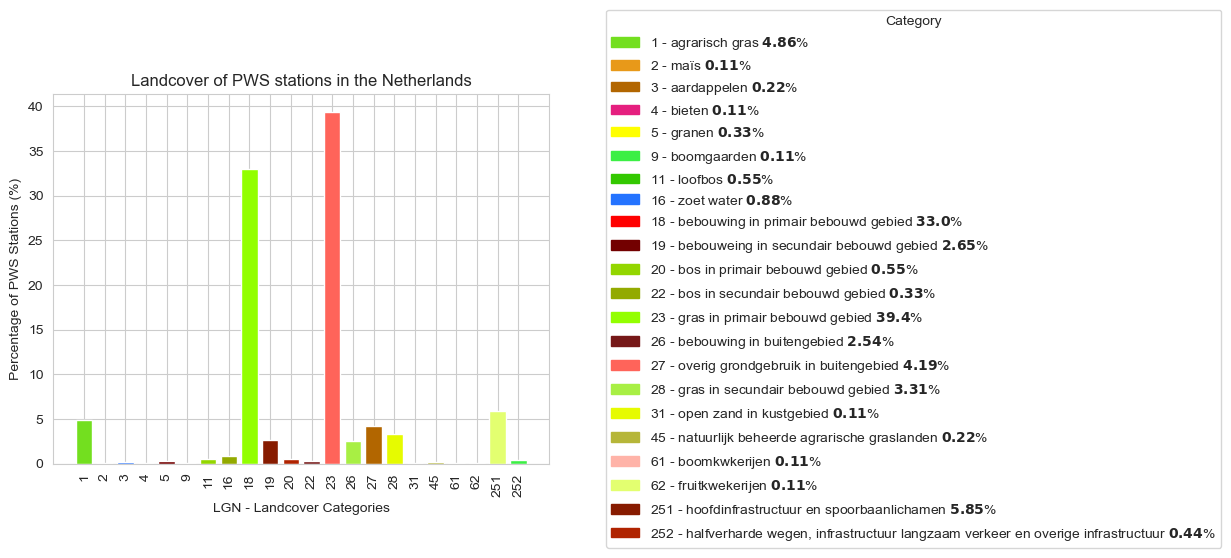

In [35]:
plt.bar([i.split(' ')[0] for i in sorted_labels], sizes_sorted["LGN_1"], color=[colours[key] for key in [i.split('$')[0][:] for i in labels]])

plt.title("Landcover of PWS stations in the Netherlands")
plt.xlabel("LGN - Landcover Categories")
plt.ylabel("Percentage of PWS Stations (%)")
plt.xticks(rotation=90)

#plt.legend(sorted_labels, loc="center left", bbox_to_anchor=(1.1, 0.5), title='Category', fontsize='10')      
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc="center left", bbox_to_anchor=(1.1, 0.5), title='Category', fontsize='10')


plt.show()

# Device Setup

In [36]:
def pie_plot(df, column):
    sizes = df[column].value_counts().sort_index() / df[column].value_counts().sum() * 100
    
    colours = {'1': 'C0',
           '2': 'C1',
           '3': 'C2',
           '4': 'C3',
           '5': 'C4',
           '6': 'C5',
           '7': 'C6',
           'U': 'C7',
           'A': 'C8',
           'B': 'C9',
           'C': 'C10',
           'D': 'C11',
           '0': 'C12'}
    
    labels = sorted(df[column].unique())

    #print(sorted(labels), [colours[key] for key in labels])

    plt.pie(sizes,
            autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance=1.2,
            colors=[colours[key] for key in labels])
    plt.axis('equal')
    plt.legend(sizes.index, loc="best", title='Category')
    plt.title(column)
    plt.tight_layout()
    plt.show()
    return None 

In [37]:
df['radiationscreen'] = (df['Meting luchttemperatuur'] == 'A') | (df['Meting luchttemperatuur'] == 'B') | (df['Meting luchttemperatuur'] == 'C')
df['radiationscreen'][df['Meting luchttemperatuur'] == '0'] = 'None'


C:\Users\adila\AppData\Local\Temp\ipykernel_19400\3632209090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['radiationscreen'][df['Meting luchttemperatuur'] == '0'] = 'None'


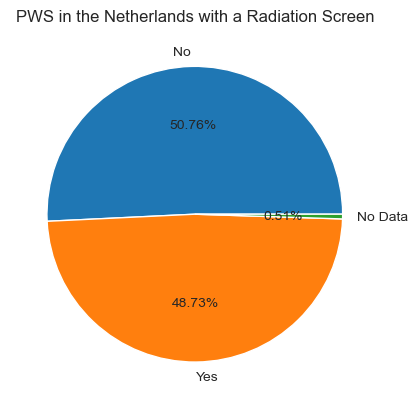

In [38]:
plt.pie(df['radiationscreen'].value_counts(), labels=['No', 'Yes', 'No Data'], autopct='%.2f%%')
plt.title('PWS in the Netherlands with a Radiation Screen')
plt.show()

C:\Users\adila\AppData\Local\Temp\ipykernel_19400\3354916476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precipitation_cal'][df['Meting neerslag'] == '0'] = 'None'


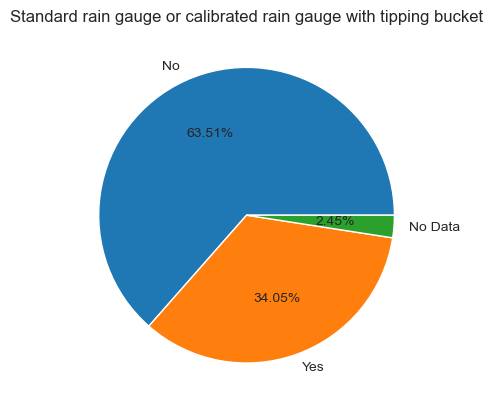

In [39]:
df['precipitation_cal'] = (df['Meting neerslag'] == 'A') | (df['Meting neerslag'] == 'B') | (df['Meting neerslag'] == 'C')
df['precipitation_cal'][df['Meting neerslag'] == '0'] = 'None'

plt.pie(df['precipitation_cal'].value_counts(), labels=['No', 'Yes', 'No Data'], autopct='%.2f%%')
plt.title("Standard rain gauge or calibrated rain gauge with tipping bucket")
plt.show()

In [40]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Station ID', 'Positie',
       'Hoogte (boven zeeniveau)', 'Tijdzone', 'Actief station',
       'Data downloaden toegestaan?', 'Website', 'Motivatie station',
       'Officieel station', 'Organisatie', 'Ligging',
       'Meting luchttemperatuur', 'Meting neerslag', 'Meting wind',
       'Stedelijke zone', 'Waarneemuren', 'lat', 'lon', 'star_rating',
       'description', 'extra_info', 'radiationscreen', 'precipitation_cal',
       'wind_cal'],
      dtype='object')

C:\Users\adila\AppData\Local\Temp\ipykernel_19400\3730020316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wind_cal'][df['Meting wind'] == '0'] = 'None'


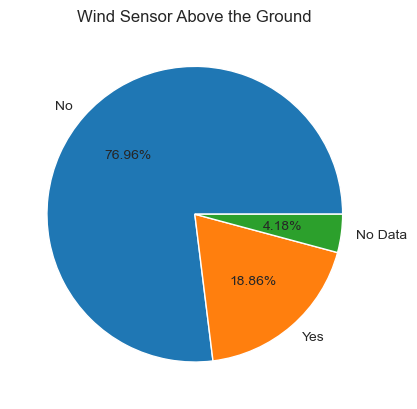

In [41]:
df['wind_cal'] = (df['Meting wind'] == 'A') | (df['Meting wind'] == 'B') 
df['wind_cal'][df['Meting wind'] == '0'] = 'None'

plt.pie(df['wind_cal'].value_counts(), labels=['No', 'Yes', 'No Data'],autopct='%.2f%%')
plt.title("Wind Sensor Above the Ground")
plt.show()

## Credibility

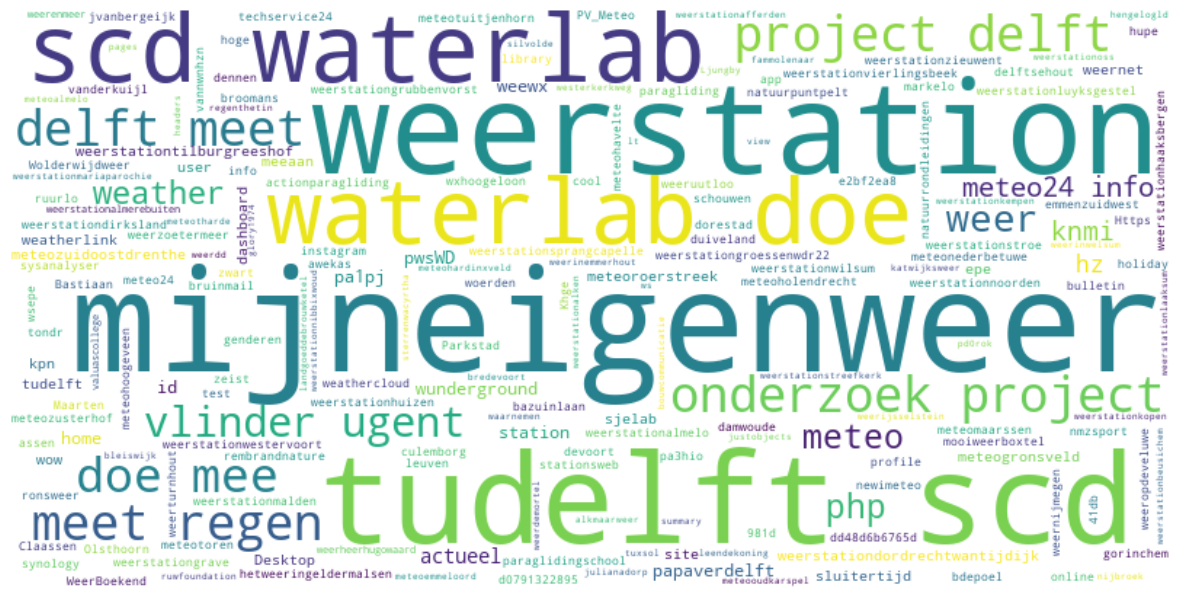

In [42]:
text = " ".join(i for i in df.Website.dropna())
text = text.replace('.nl', '')
text = text.replace('.net', '')
text = text.replace('https://', '')
text = text.replace('www.', '')
text = text.replace('html', '')
text = text.replace('https', '')
text = text.replace('.com', '')
text = text.replace('.org', '')
text = text.replace('.eu', '')
text = text.replace('index', '')
text = text.replace('htm', '')


stopwords = list(STOPWORDS) + stop_words #dutch and english
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=800, height=400).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.title('Website of PWS Owners in the Netherlands')
plt.show()

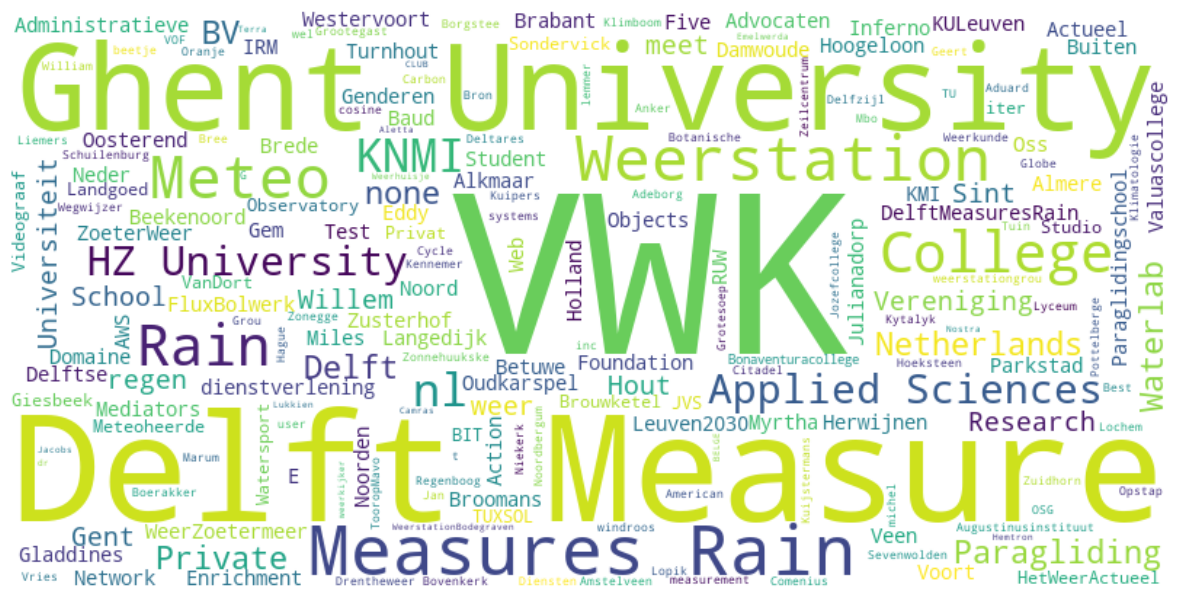

In [43]:
text = " ".join(i for i in df.Organisatie.dropna())

stopwords = list(STOPWORDS) + stop_words #dutch and english
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=800, height=400).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.title('Website of PWS Owners in the Netherlands')
plt.show()

In [44]:
metadata_columns = [
 'Ligging',
 'Meting luchttemperatuur',
 'Meting neerslag',
 'Meting wind',
 'Stedelijke zone',
 'Waarneemuren',
 'description',
 'extra_info',
]

In [45]:
check_empty = pd.concat([df[metadata_columns].iloc[:,:6] == "U", df[metadata_columns].iloc[:,-2:].isna()],axis=1)
amount_empty = check_empty.sum(axis=1)

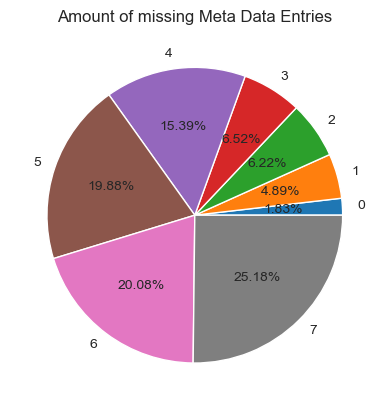

In [46]:
plt.pie(sorted(amount_empty.value_counts()), labels=sorted(amount_empty.value_counts().index),autopct='%.2f%%')
plt.title("Amount of missing Meta Data Entries")
plt.show()